In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [3]:
# Load the MNIST Data Set
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the Data and Reshape it to Float32
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape Data into Vectors (Flattening)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Dimension of the Latent Space
encoding_dim = 32  

# Encoder + Layers
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder + Layers
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder Model with Encoder and Decoder
autoencoder = Model(input_img, decoded)

# Initialize Encoder Model for Test Set
encoder = Model(input_img, encoded)

# Decoder Model for Visualization of Test Set
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoded_output = decoder_layer2(decoder_layer1(encoded_input))
decoder = Model(encoded_input, decoded_output)

# Summary of the Autoencoder Model
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the Model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.3245 - val_loss: 0.1537
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1453 - val_loss: 0.1195
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1177 - val_loss: 0.1090
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1091 - val_loss: 0.1040
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1044 - val_loss: 0.1005
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1009 - val_loss: 0.0976
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0981 - val_loss: 0.0965
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0963 - val_loss: 0.0941
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0951 - val_loss: 0.0931
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0941 - val_loss: 0.0922
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0933 - val_loss: 0.0916
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


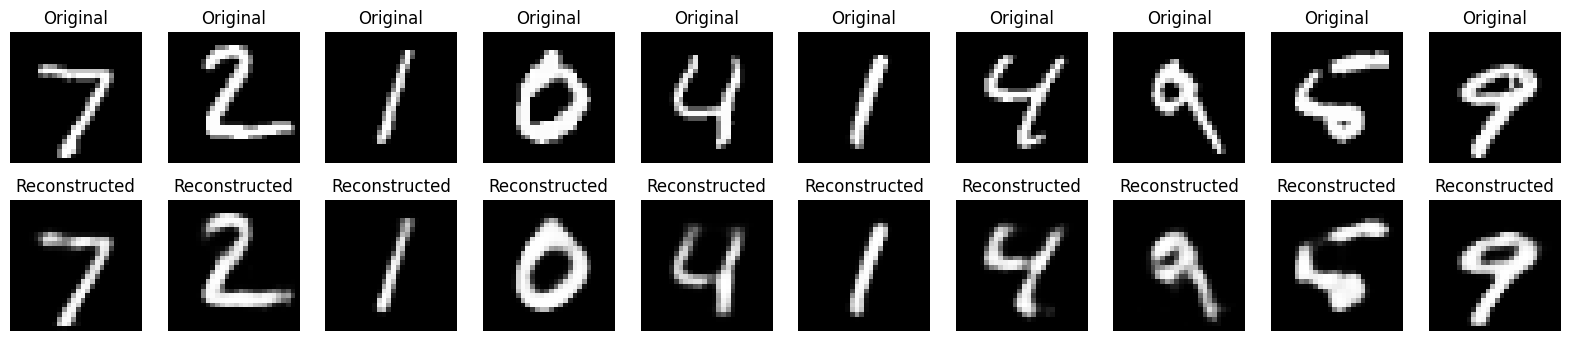

In [6]:
# Encode the test images to Latent Space
encoded_imgs = encoder.predict(x_test)

# Reconstruct the images from the Latent Space
decoded_imgs = decoder.predict(encoded_imgs)

# Visualize some of the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()